<a href="https://colab.research.google.com/github/cpshim/chd-logistic-classifier/blob/main/Heart_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from math import e, log

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")
data_norm = data.copy()

print("Dataset: ")
data

Dataset: 


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [ ]:
# Find the total count and percentage of ones and zeroes
num_of_ones = data['chd'].value_counts()[1]
num_of_zeros = data['chd'].value_counts()[0]

percentage_one = round(num_of_ones / (num_of_ones + num_of_zeros) * 100, 2)
percentage_zero = round(num_of_zeros / (num_of_ones + num_of_zeros) * 100, 2)
print(f"Percentage of ones: {percentage_one}")
print(f"Percentage of zeros: {percentage_zero}\n")

Percentage of ones: 34.63
Percentage of zeros: 65.37



In [ ]:
# Find amount of missing data and drop it
missing_data = data.iloc[-1].to_list()[0] - len(data)
print(f"Number of missing data: {missing_data}\n")

Number of missing data: 1



In [ ]:
# Get answer for last 162 test data
data_test_ans = data['chd'].tail(162)

In [ ]:
# Perform one-hot encoding
one_hot = pd.get_dummies(data, columns=['famhist'])

one_hot = one_hot.drop(['famhist_Absent'], axis=1)

one_hot = one_hot.drop(['chd'], axis=1)
one_hot = one_hot[
    ['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist_Present', 'typea', 'obesity', 'alcohol', 'age']]

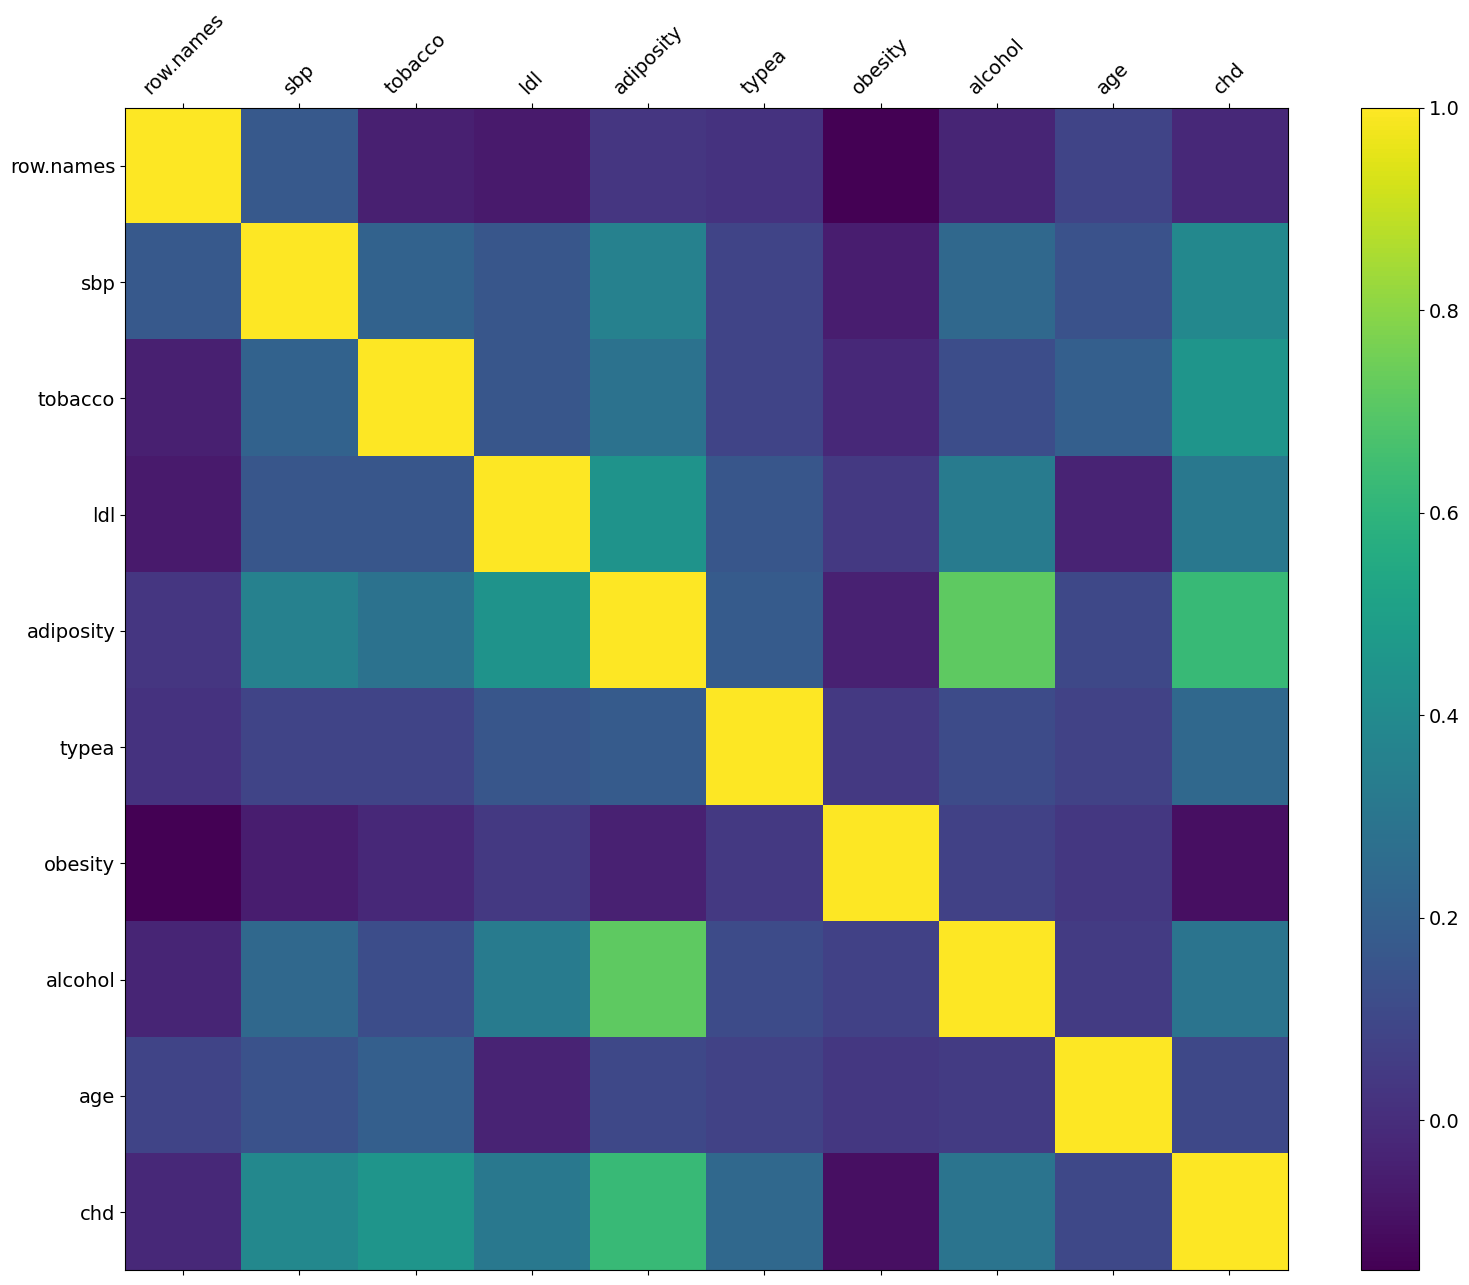

In [ ]:
# Show correlation matrix
correlation_matrix = one_hot.corr()
f = plt.figure(figsize=(19, 15))
plt.matshow(correlation_matrix, fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14,
           rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [ ]:
# Normalize dataset
mean = one_hot.mean()
std = one_hot.std()

data_norm = (one_hot - mean) / std

data_norm['row.names'] = 1
data_norm['famhist_Present'] = one_hot['famhist_Present']

data_norm

,row.names,sbp,tobacco,ldl,adiposity,famhist_Present,typea,obesity,alcohol,age
0,1,1.057417,1.821099,0.477894,-0.295183,1,-0.418017,-0.176594,3.274189,0.628654
1,1,0.276789,-0.789382,-0.159507,0.411694,0,0.193134,0.670646,-0.612081,1.381617
2,1,-0.991731,-0.774141,-0.608585,0.883374,1,-0.112441,0.734723,-0.540597,0.217947
3,1,1.545310,0.841352,0.806252,1.622382,1,-0.214300,1.411091,0.294742,1.039361
4,1,-0.211103,2.169453,-0.598928,0.305020,1,0.702427,-0.012842,1.645991,0.423301
...,...,...,...,...,...,...,...,...,...,...
457,1,3.692037,-0.704470,0.598614,0.811401,0,1.109862,0.570971,-0.696228,1.039361
458,1,2.130781,0.122871,-0.159507,0.860240,0,-0.112441,0.608942,0.068445,0.628654
459,1,-1.479624,-0.138395,-1.521228,-1.307946,0,-1.334744,-1.413043,0.391960,0.834008
460,1,-0.991731,0.384137,3.317227,0.691875,0,1.109862,0.309916,0.282897,-0.192760


In [ ]:
# Split dataset into training and test
data300 = data_norm.head(300)
data162 = data_norm.tail(162)

In [ ]:
# Initialize random thetas
rand_thetas = []
for i in range(0, 10):
    rand_thetas.append(random.uniform(0, 1))

print("Initialized thetas: ")
rand_thetas

Initialized thetas: 


[0.6457593730460056,
 0.6210601046749227,
 0.9289465770058829,
 0.3403317626508705,
 0.18333135958178948,
 0.8315043742997971,
 0.4727785445278314,
 0.8707510232499254,
 0.8219738460702156,
 0.19254209823660495]

In [ ]:
data_norm_numpy = data_norm.to_numpy()
data_numpy = data.to_numpy()
data_train_numpy = data300.to_numpy()
data_test_numpy = data162.to_numpy()

In [ ]:
# Define model, cost function, and gradient descent
def hypothesis_model(thetas, row):
    z = np.dot(thetas.T, row)
    x = (1 / (1 + e ** (-z)))
    return x


def cost_function(data_norm, data, thetas):
    sum = 0
    for row in range(len(data_train_numpy)):
        hx = hypothesis_model(thetas, data_train_numpy[row])

        y = data_numpy[row][10]

        sum += y * log(hx) + (1 - y) * log(1 - hx)
    J = -1 / len(data_train_numpy) * sum
    return J


def batch_gradient(data_norm, thetas):
    i = 0
    data_size = len(data_norm_numpy)
    for col in range(0, 10):
        sum = 0
        for row in range(len(data_norm_numpy)):
            sum += (data_numpy[row][10] - hypothesis_model(thetas, data_norm_numpy[row])) * data_norm_numpy[row][col]
        thetas[col] = thetas[col] + learning_rate * (1 / data_size) * sum
        i += 1


def mini_batch_gradient(data_norm, thetas, batch):
    i = 0
    data_size = batch
    for col in range(0, 10):
        sum = 0
        for row in range(len(data_train_numpy)):
            if (i % batch == 0):
                sum += (data_numpy[row][10] - hypothesis_model(thetas, data_train_numpy[row])) * data_train_numpy[row][
                    col]
                thetas[col] = thetas[col] + learning_rate * (1 / data_size) * sum
                sum = 0
                i = 0
            else:
                sum += (data_numpy[row][10] - hypothesis_model(thetas, data_train_numpy[row])) * data_train_numpy[row][
                    col]
                i += 1
        thetas[col] = thetas[col] + learning_rate * (1 / data_size) * sum
        i += 1

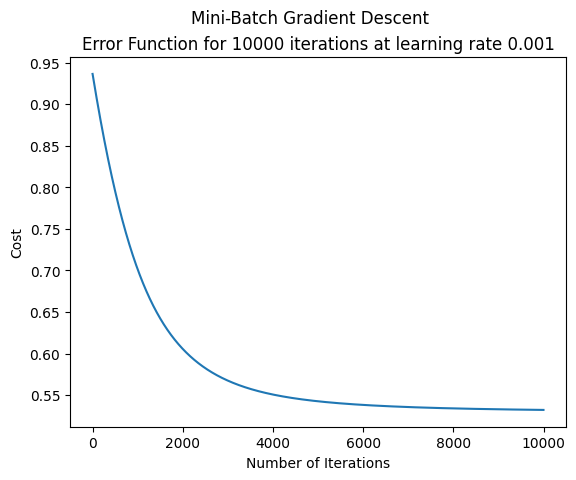

In [ ]:
cost = []
learning_rate = 0.001
thetas_mini_10000 = np.array(rand_thetas)

# Train model by applying mini-batch gradient descent for 10000 epochs
for i in range(0, 10000):
    mini_batch_gradient(data_train_numpy, thetas_mini_10000, 100)
    cost.append(cost_function(data_train_numpy, data, thetas_mini_10000))

plt.plot(cost)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Error Function for 10000 iterations at learning rate 0.001')
plt.suptitle('Mini-Batch Gradient Descent')
plt.show()

In [ ]:
print("Thetas after training:")
thetas_mini_10000

Thetas after training:


array([-0.9410332 , -0.06449933,  0.32819285,  0.25697619,  0.15991895,
        0.59277069,  0.4016841 , -0.10208274,  0.13784054,  0.58211546])

In [ ]:
# Test accuracy with testing data with threshold of 67%
correct = 0

for i in range(161):
  if hypothesis_model(thetas_mini_10000, data_test_numpy[i]) > 0.67:
    if data_test_ans.iloc[i] == 1:
      correct += 1
  else:
    if data_test_ans.iloc[i] == 0:
      correct += 1

print(f'Accuracy of model: {correct/162:.2f}%')

Accuracy of model: 0.76%


In [ ]:
# Test values by plugging into model
test1 = [1, 1.057417, 1.821099, 0.477894, -0.295183, 1, -0.418017, -0.176594, 3.274189, 0.628654]
test2 = [1, -0.991731, -0.774141, -0.608585, 0.883374, 1, -0.112441, 0.734723, -0.540597, 0.217947]
print("There is a {hypo:.2f}% chance of heart disease with the inputted feature values"
      .format(hypo=hypothesis_model(thetas_mini_10000, test1) * 100))
print("There is a {hypo:.2f}% chance of heart disease with the inputted feature values"
      .format(hypo=hypothesis_model(thetas_mini_10000, test2) * 100))

There is a 71.59% chance of heart disease with the inputted feature values
There is a 34.95% chance of heart disease with the inputted feature values
